The following three cells are necessary for setting up our development environment.
- *Importing drive* allows us to utilize the files that exist within our Google Drive.
- *%cd* navigates towards a folder that contains necessary files and training data.
- *ls* displays the files that exist within the aforementioned folder (a.k.a. current working directory).

In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
%cd /content/drive/My Drive/CaisLessons/1: Intro + Image Classification

/content/drive/My Drive/CaisLessons/1: Intro + Image Classification


# CAIS++ Lesson 1

### Creating your first image classifier

#### So what is image classification?
Classification is a type of machine learning problem where we want to assign each data point a label (or class).  For image classification, this means we are creating a machine learning model that can assign a label to a specific image.  So, if you give an image to the model, it will try to predict what *class* the image belongs to.

To start off, we are going to import three things from the **caispp** python package.
* `ImageDataset` - Creates an image dataset from a folder structure like the example dataset.
* `ImageClassifier` - Creates an image classifier. It requires you to first create an `ImageDataset` to use it.
* `Path` - To create a `Path` pass in a string that represents the path from this notebook to the dataset. 


In [23]:
!pip install caispp
from caispp import ImageDataset, ImageClassifier, Path

#### Creating the image dataset

Dataset distribution:


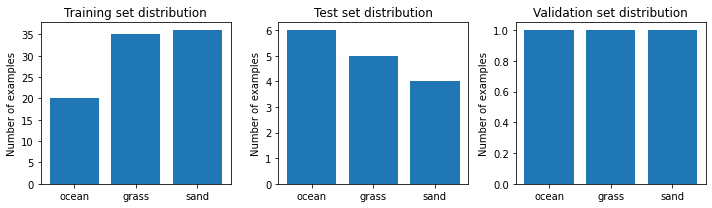

In [24]:
path = Path('data/')
dataset = ImageDataset(path, show_distribution=True)

You'll notice that the dataset is made up of three different types of sets:
* **Training set** - This is the set of images that the model is trained on.  The model learns by assigning classes to this set of images.   
* **Validation set** - While training, it is useful to know how well the model generalizes to data it has never seen before.  This is the main purpose of the validation set.
* **Test set** - This is the set of images that we reserve until the model is done training.  We can evaluate how good the model is based on how well it performs on the test set.

Question: What's the difference between the test set and the validation set?

#### Create classifier

In [25]:
classifier = ImageClassifier(dataset)

87916544/87910968 [==============================] - 3s 0us/step


#### Train classifier

In [26]:
classifier.train(epochs=10)

Epoch 1/10
12/12 [==============================] - 14s 1s/step - loss: 0.7115 - acc: 0.6813 - val_loss: 0.2709 - val_acc: 1.0000
Epoch 2/10
12/12 [==============================] - 13s 1s/step - loss: 0.1798 - acc: 0.9780 - val_loss: 0.1052 - val_acc: 1.0000
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.0924 - acc: 1.0000 - val_loss: 0.0617 - val_acc: 1.0000
Epoch 4/10
12/12 [==============================] - 13s 1s/step - loss: 0.0592 - acc: 1.0000 - val_loss: 0.0437 - val_acc: 1.0000
Epoch 5/10
12/12 [==============================] - 13s 1s/step - loss: 0.0413 - acc: 1.0000 - val_loss: 0.0322 - val_acc: 1.0000
Epoch 6/10
12/12 [==============================] - 13s 1s/step - loss: 0.0318 - acc: 1.0000 - val_loss: 0.0251 - val_acc: 1.0000
Epoch 7/10
12/12 [==============================] - 13s 1s/step - loss: 0.0258 - acc: 1.0000 - val_loss: 0.0213 - val_acc: 1.0000
Epoch 8/10
12/12 [==============================] - 13s 1s/step - loss: 0.0219 - acc: 1.00

What are all these numbers?
 * **Epoch** - An epoch is one cycle through all the training data.  After the first epoch, the image classifier has seen every image in the training set exactly once.
 * **Loss** - The loss is a metric for how well the model is fitting the training data.  We want to minimize this number.  If a model predicts the incorrect label with a high confidence, it will have a high loss (the loss will be lower if the model is less confident about its incorrect prediction).  *The model learns by changing in an attempt to reduce this loss* (we will go into more detail about what it is changing/how it is changing later in the curriculum).
 * **Acc** - This is the accuracy of the model, or the percentage of predictions it makes that are correct.
 $\frac{\textrm{# correct predictions}}{\textrm{# predictions}}$.
 
What about val_loss and val_acc?

#### Model over time

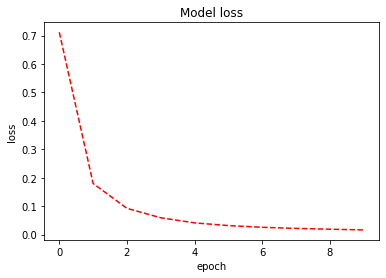

In [27]:
classifier.show_history('loss')

Try seeing the history of 'loss', 'acc' and 'both'.

#### How'd we do?

Accuracy:  1.0 , f1-score:  1.0


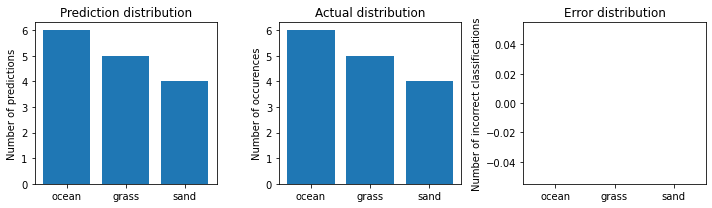

In [28]:
classifier.test(show_distribution=True)

Not bad!

Questions?